In [1]:
import matplotlib.pyplot as plt
# plt.style.use('seaborn-')
plt.rcParams["figure.figsize"] = (14,8)
import numpy as np 

In [2]:
def load(directory,name,runs):
    run = 0
    values = np.load(directory+name+"-"+str(run)+".npy")
    for run in range(run+1,runs):
        value = np.load(directory+name+"-"+str(run)+".npy")
        values = np.dstack((values,value))
        
    means = np.mean(values,axis=2)
    stds = np.std(values,axis=2)
    
    return means,stds    

In [3]:
directory = "../gradient-values/"

ResNet18mean,ResNet18std = load(directory,"ResNet18",5)
ResNet34mean,ResNet34std = load(directory,"ResNet34",5)
ResNet50mean,ResNet50std = load(directory,"ResNet50",5)
BranchedResNet18mean,BranchedResNet18std = load(directory,"BranchedResNet18",5)
BranchedResNet34mean,BranchedResNet34std = load(directory,"BranchedResNet34",5)
BranchedResNet50mean,BranchedResNet50std = load(directory,"BranchedResNet50",5)

In [4]:
def plot_error(values,errors,name):
    length = values[0].shape[0]
    layers = np.arange(length)
    n_epochs = values.shape[0]
    step=25
    for epoch in range(0,n_epochs,step):
        gradients = values[epoch,:]
        error = errors[epoch,:]
        
        plt.plot(layers,gradients,label=("epoch:"+str(epoch)))
        plt.fill_between(layers, gradients-error, gradients+error,alpha=0.4)

    plt.title("Layer-wise gradients in "+name)
    plt.yscale('log')
    plt.ylabel("Average gradient")
    plt.xlabel("Convolutional layer")
    plt.legend(loc='best')
    plt.savefig(('../results/CIFAR10/Weight Changes/'+name+'.pdf'), bbox_inches = 'tight')
    plt.show()


In [5]:
# old plotting function

# def plot(values,name):
#     length = values[0].shape[0]
#     layers = np.arange(length)
#     count=0
#     step=5
#     for gradients in values[::step]:
#       count = count + 1
#       plt.plot(layers,gradients,label=("epoch:"+str(count*step)))

#     plt.title("Layer-wise gradients in "+name)
#     plt.yscale('log')
#     plt.ylabel("Average gradient")
#     plt.xlabel("Convolutional layer")
#     plt.legend(loc='best')
#     plt.savefig(('../results/CIFAR10/Weight Changes/'+name+'.pdf'), bbox_inches = 'tight')
#     plt.show()

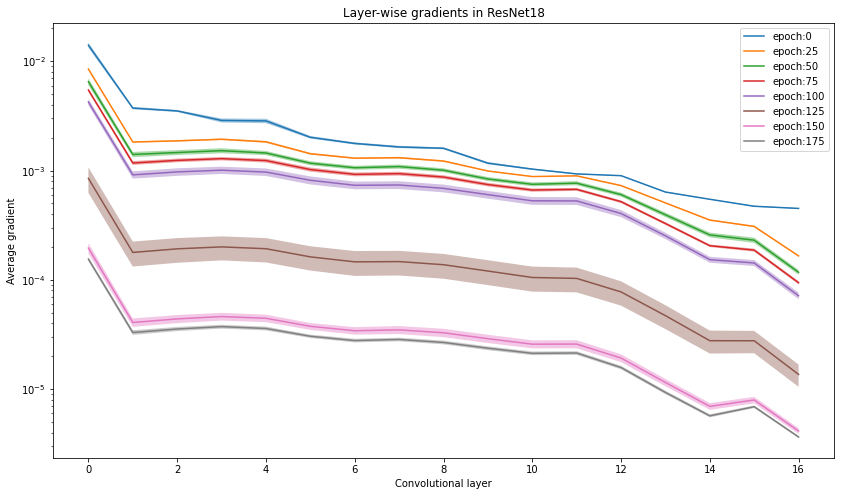

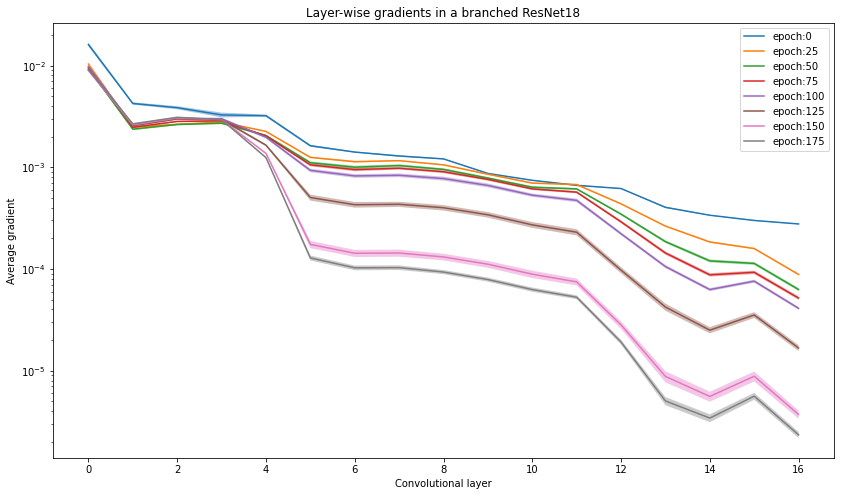

In [6]:
plot_error(ResNet18mean,ResNet18std,"ResNet18")
# plot(DropoutResNet18,"ResNet18 with dropout")
plot_error(BranchedResNet18mean,BranchedResNet18std,"a branched ResNet18")

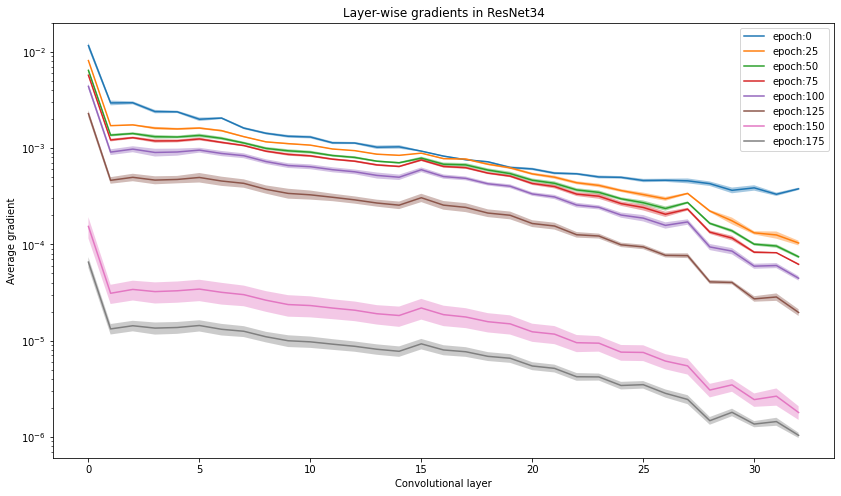

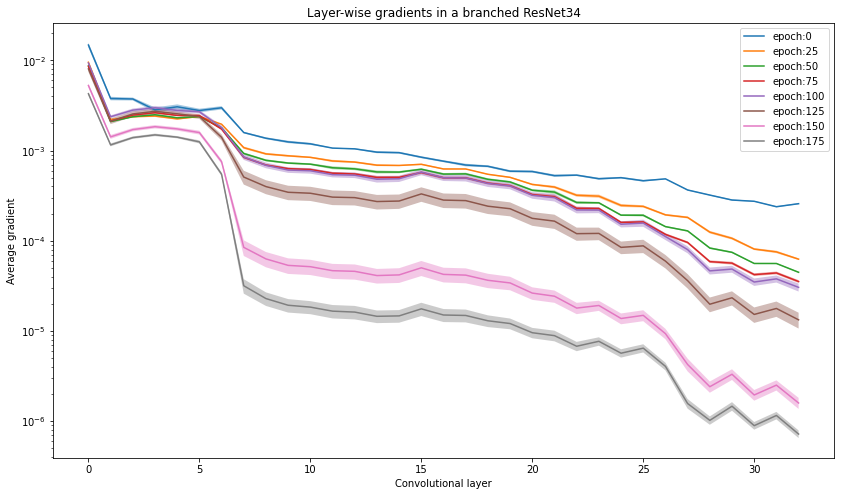

In [7]:
plot_error(ResNet34mean,ResNet34std,"ResNet34")
# plot(DropoutResNet18,"ResNet18 with dropout")
plot_error(BranchedResNet34mean,BranchedResNet34std,"a branched ResNet34")

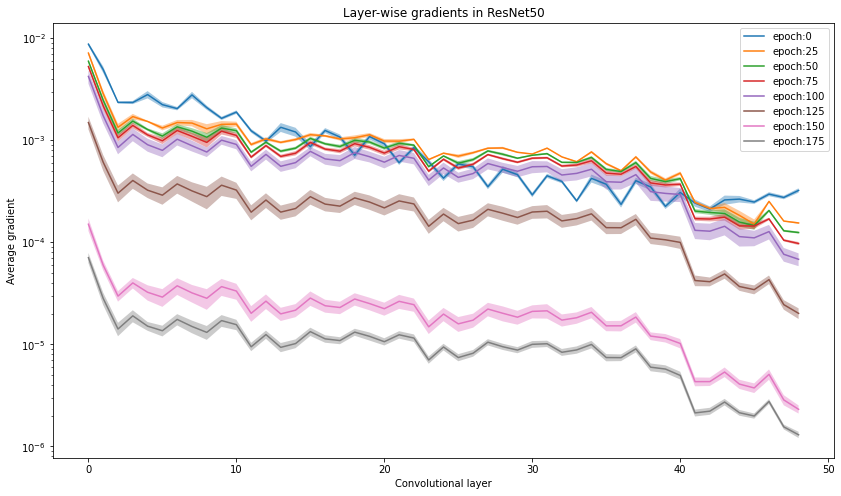

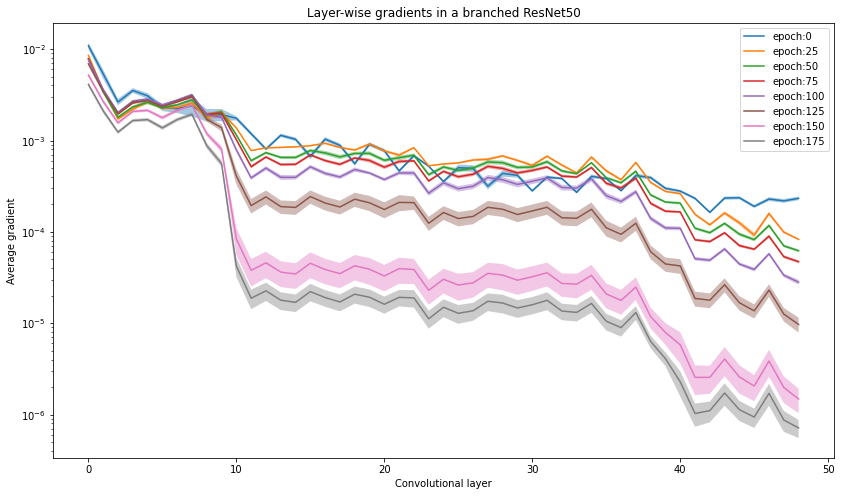

In [8]:
plot_error(ResNet50mean,ResNet50std,"ResNet50")
# # plot(DropoutResNet18,"ResNet18 with dropout")
plot_error(BranchedResNet50mean,BranchedResNet50std,"a branched ResNet50")

In [9]:
# plot(GoogLeNet,"GoogLeNet")